In [1]:
from pyscf import gto, scf
from pyscf.lib import logger
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
molecules = [
    ('H 0 0 0; H 0 0 1.4', 'sto-6g', 0),
    ('H 0 0 0; H 0 0 1.4', '6-31g', 0),
    ('H 0 0 0; H 0 0 1.4', 'cc-pvdz', 0),
    ('H 0 0 0; H 0 0 1.4', 'cc-pvqz', 0),
    ('H 0 0 0; Li 0 0 3', 'sto-6g', 0),
    ('H 0 0 0; Li 0 0 3', '6-31g', 0),
    ('H 0 0 0; Li 0 0 3', 'cc-pvdz', 0),
    ('H 0 0 0; Li 0 0 3', 'cc-pvqz', 0),
    ('He 0 0 0; H 0 0 1.4623', 'sto-6g', 1),
    ('He 0 0 0; H 0 0 1.4623', '6-31g', 1),
    ('He 0 0 0; H 0 0 1.4623', 'cc-pvdz', 1),
    ('He 0 0 0; H 0 0 1.4623', 'cc-pvqz', 1),
    ('O 0 0 0.227; H 0 1.353 -0.908; H 0 -1.353 -0.908', 'sto-6g', 0),
    ('O 0 0 0.227; H 0 1.353 -0.908; H 0 -1.353 -0.908', '6-31g', 0),
    ('O 0 0 0.227; H 0 1.353 -0.908; H 0 -1.353 -0.908', 'cc-pvdz', 0),
    ('O 0 0 0.227; H 0 1.353 -0.908; H 0 -1.353 -0.908', 'cc-pvqz', 0),
]

time_elapsed_list = []
energy_total_list = []

for i, (atom, basis, charge) in enumerate(molecules):
    mol = gto.M(atom=atom, basis=basis, charge=charge)
    mol.unit = 'bohr'
    mol.build()
    mf = scf.RHF(mol)
    mf.verbose = 0
    log = logger.new_logger(mf, mf.verbose)
    start_time = logger.perf_counter()
    mf.kernel()
    time_elapsed = logger.perf_counter() - start_time
    energy_total = mf.e_tot

    time_elapsed_list.append(time_elapsed)
    energy_total_list.append(energy_total)

In [3]:
e_tot = np.array(energy_total_list).reshape(4, 4).T
time_elapsed = np.array(time_elapsed_list).reshape(4, 4).T

In [4]:
df_energy = pd.DataFrame(e_tot, index=['sto-6g', '6-31g', 'cc-pvdz', 'cc-pvqz'], columns=['H2', 'LiH', 'HeH+', 'H2O'])
df_energy

,H2,LiH,HeH+,H2O
sto-6g,-1.125324,-7.952205,-2.873664,-75.674702
6-31g,-1.126743,-7.979178,-2.909843,-75.980547
cc-pvdz,-1.128709,-7.983565,-2.923616,-76.026026
cc-pvqz,-1.133459,-7.987150,-2.932873,-76.064344


In [5]:
df_time = pd.DataFrame(time_elapsed, index=['sto-6g', '6-31g', 'cc-pvdz', 'cc-pvqz'], columns=['H2', 'LiH', 'HeH+', 'H2O'])
df_time

,H2,LiH,HeH+,H2O
sto-6g,0.412971,0.798924,2.088801,1.625984
6-31g,1.897331,1.833823,0.588161,0.871624
cc-pvdz,0.602984,0.950684,0.691846,1.157344
cc-pvqz,1.257204,1.878083,1.344336,5.355622


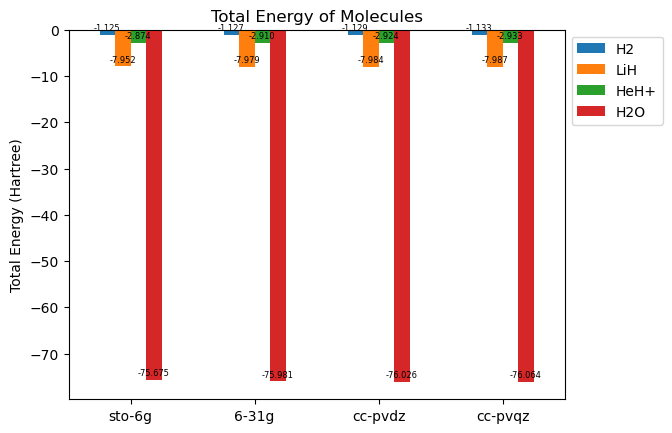

In [6]:
ax = df_energy.plot.bar(rot=0)
for p in ax.patches:
    ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=6, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.ylabel('Total Energy (Hartree)')
plt.title('Total Energy of Molecules')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

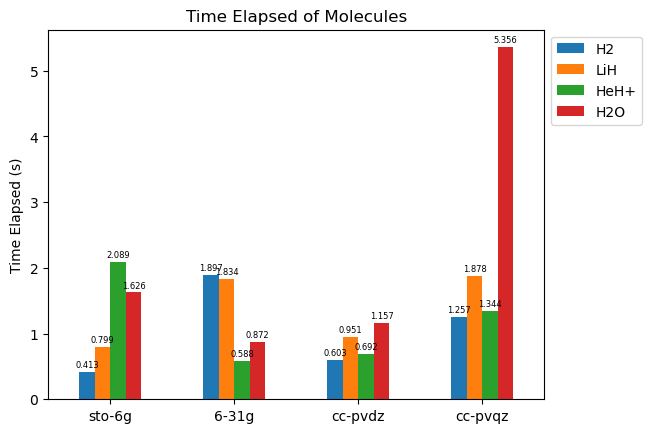

In [7]:
ax = df_time.plot.bar(rot=0)
for p in ax.patches:
    ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=6, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.ylabel('Time Elapsed (s)')
plt.title('Time Elapsed of Molecules')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()